<a href="https://colab.research.google.com/github/KorvenDalas/HFT/blob/main/CW1_HFT_01_Initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A) Download data and figures

In [80]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for Visa and MasterCard
ticker_V = 'V'      # Ticker symbol for Visa
ticker_MA = 'MA'    # Ticker symbol for MasterCard

# Define the date range and time interval
start_date = '2025-02-05'
end_date = '2025-02-06'
time_interval = '1m'

# Download the data
df_V = yf.download(ticker_V, start = start_date, end = end_date, interval = time_interval)
df_MA = yf.download(ticker_MA, start = start_date, end = end_date, interval = time_interval)

# Check and print the number of data points for each asset
print("\n")
print("Data length for Visa (V):", len(df_V))
print("Data length for MasterCard (MA):", len(df_MA))
if len(df_V) == len(df_MA):
    print("Both dataset have the same length")
else:
    print("The datasets have different length")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Data length for Visa (V): 390
Data length for MasterCard (MA): 383
The datasets have different length


In [81]:
df_V.head()

Price,Close,High,Low,Open,Volume
Ticker,V,V,V,V,V
Datetime,,,,,
2025-02-05 14:30:00+00:00,345.959991,346.299988,345.250000,346.000000,143133
2025-02-05 14:31:00+00:00,345.515015,345.910004,345.515015,345.790009,6699
2025-02-05 14:32:00+00:00,346.029999,346.029999,345.260010,345.635010,8739
2025-02-05 14:33:00+00:00,345.964996,346.079987,345.725006,345.950012,12186
2025-02-05 14:34:00+00:00,346.139893,346.149994,345.750000,345.964996,17578


In [82]:
df_MA.head()

Price,Close,High,Low,Open,Volume
Ticker,MA,MA,MA,MA,MA
Datetime,,,,,
2025-02-05 14:30:00+00:00,560.364990,561.604980,559.799988,561.349976,44124
2025-02-05 14:31:00+00:00,561.717224,561.717224,560.820007,560.820007,3536
2025-02-05 14:32:00+00:00,561.859985,561.859985,560.722473,560.984985,4738
2025-02-05 14:33:00+00:00,561.114990,561.940002,560.965027,561.859985,3568
2025-02-05 14:34:00+00:00,561.510010,561.510010,560.599976,561.080017,5396


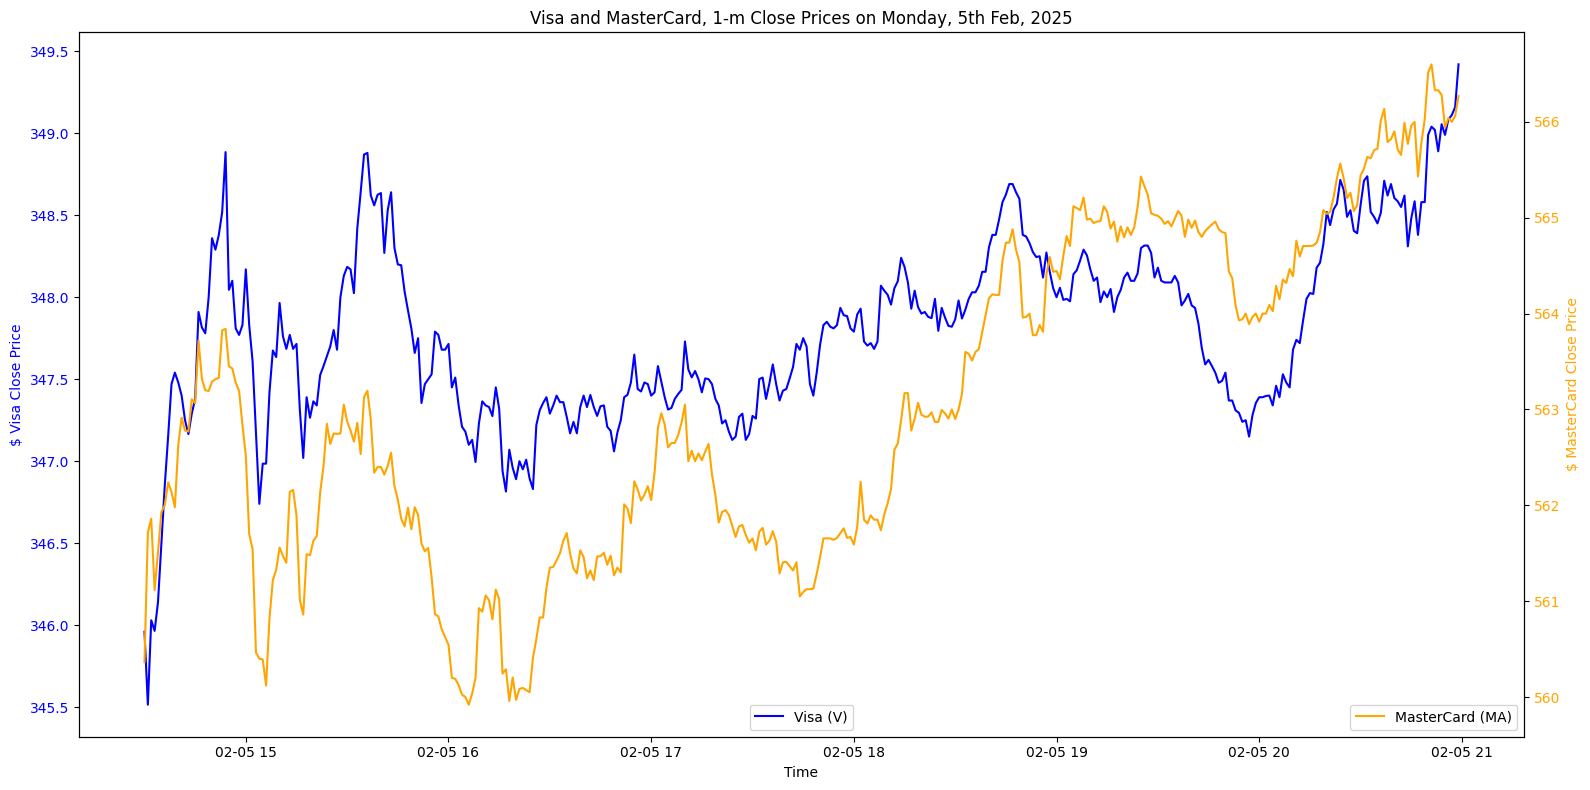

In [83]:
# Plotting with dual y-axes
fig, ax1 = plt.subplots(figsize = (16, 8))

# Plot Visa data on left y-axis
ax1.plot(df_V.index, df_V['Close'], color = 'blue', label = 'Visa (V)')
ax1.set_xlabel('Time')
ax1.set_ylabel('$ Visa Close Price', color = 'blue')
ax1.tick_params(axis='y', labelcolor = 'blue')
ax1.legend(loc = "lower center")

# Create a twin Axes sharing the same x-axis for MasterCard data
ax2 = ax1.twinx()
ax2.plot(df_MA.index, df_MA['Close'], color = 'orange', label = 'MasterCard (MA)')
ax2.set_ylabel('$ MasterCard Close Price', color = 'orange')
ax2.tick_params(axis='y', labelcolor = 'orange')
ax2.legend(loc = "lower right")

plt.title('Visa and MasterCard, 1-m Close Prices on Monday, 5th Feb, 2025')
plt.tight_layout()
plt.show()

In [84]:
# Combine the two dataframes based on the Datetime index
combined_df = pd.concat([df_V[['Open', 'Close']], df_MA[['Open', 'Close']]], axis = 1, keys=['Visa', 'MasterCard'])

# Forward fill missing values to handle different rows
combined_df = combined_df.ffill()

# Rename columns for clarity
combined_df.columns = ['Stock1_Open', 'Stock1_Close', 'Stock2_Open', 'Stock2_Close']

# Lenght of dataframe
M = len(combined_df['Stock1_Close'])
print(f'Lenght of final dataframe: {M}\n')

# Display the resulting dataframe
print(combined_df)

Lenght of final dataframe: 390

                           Stock1_Open  Stock1_Close  Stock2_Open  \
Datetime                                                            
2025-02-05 14:30:00+00:00   346.000000    345.959991   561.349976   
2025-02-05 14:31:00+00:00   345.790009    345.515015   560.820007   
2025-02-05 14:32:00+00:00   345.635010    346.029999   560.984985   
2025-02-05 14:33:00+00:00   345.950012    345.964996   561.859985   
2025-02-05 14:34:00+00:00   345.964996    346.139893   561.080017   
...                                ...           ...          ...   
2025-02-05 20:55:00+00:00   349.002502    348.989990   566.405029   
2025-02-05 20:56:00+00:00   348.950012    349.084991   565.869995   
2025-02-05 20:57:00+00:00   349.109985    349.109985   566.015015   
2025-02-05 20:58:00+00:00   349.130005    349.160004   566.020020   
2025-02-05 20:59:00+00:00   349.160004    349.420013   566.070007   

                           Stock2_Close  
Datetime                    

#B) δ and ρ

In [85]:
# Extract the 1-minute Close price series for each asset
V_data = combined_df['Stock1_Close']
MA_data = combined_df['Stock2_Close']

In [86]:
# Import the cointegration test function, the Engle-Granger cointegration test
from statsmodels.tsa.stattools import coint

# The test checks if the two series share a long-term equilibrium relationship.
# The null hypothesis (H0) is that the series are not cointegrated.
# If the p-value is low (typically below 0.05), we reject H0 and conclude that
# the series are cointegrated.
score, p_value, _ = coint(V_data, MA_data)
print(f'Engle-Granger cointegration test p-value: {p_value:.6f}')

Engle-Granger cointegration test p-value: 0.000295


In [87]:
# Extract the opening price for Visa
S1_0 = combined_df['Stock1_Open'][0]

# Extract the opening price for MasterCard
S2_0 = combined_df['Stock2_Open'][0]

print(f'Opening price of Visa: {S1_0}')
print(f'Opening price of MasterCard: {S2_0}\n')

# Compute the log returns, r1 for Visa and r2 for MasterCard, returns per minute
r1 = np.log(combined_df['Stock1_Close'] / combined_df['Stock1_Close'].shift(1))
r2 = np.log(combined_df['Stock2_Close'] / combined_df['Stock2_Close'].shift(1))

print(f'Log returns of Visa:\n{r1}\n')
print(f'Log returns of MasterCard:\n{r2}\n')

Opening price of Visa: 346.0
Opening price of MasterCard: 561.3499755859375

Log returns of Visa:
Datetime
2025-02-05 14:30:00+00:00         NaN
2025-02-05 14:31:00+00:00   -0.001287
2025-02-05 14:32:00+00:00    0.001489
2025-02-05 14:33:00+00:00   -0.000188
2025-02-05 14:34:00+00:00    0.000505
                               ...   
2025-02-05 20:55:00+00:00   -0.000186
2025-02-05 20:56:00+00:00    0.000272
2025-02-05 20:57:00+00:00    0.000072
2025-02-05 20:58:00+00:00    0.000143
2025-02-05 20:59:00+00:00    0.000744
Freq: min, Name: Stock1_Close, Length: 390, dtype: float64

Log returns of MasterCard:
Datetime
2025-02-05 14:30:00+00:00         NaN
2025-02-05 14:31:00+00:00    0.002410
2025-02-05 14:32:00+00:00    0.000254
2025-02-05 14:33:00+00:00   -0.001327
2025-02-05 14:34:00+00:00    0.000704
                               ...   
2025-02-05 20:55:00+00:00   -0.000601
2025-02-05 20:56:00+00:00    0.000177
2025-02-05 20:57:00+00:00   -0.000071
2025-02-05 20:58:00+00:00    0.000106

<ipython-input-87-2c9db48e405a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S1_0 = combined_df['Stock1_Open'][0]
<ipython-input-87-2c9db48e405a>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S2_0 = combined_df['Stock2_Open'][0]


In [88]:
# δ (delta) is dificult to estimate. It indicates how forcefully and how
# quickly the process reverts to its mean. To Simplify, operations δ = 1
delta = 1
print(f'Delta: {delta}')

# Calculate Rho with Pearson correlation coefficient between the log returns of
# Stock 1 and Stock 2
rho = r1.corr(r2)
print(f'Rho: {rho:.5f}')

Delta: 1
Rho: 0.45492


#C) β

In [89]:
from scipy.stats import linregress

# Perform linear regression using Ordinary Least Squares
result = linregress(np.log(combined_df['Stock1_Close']), np.log(combined_df['Stock2_Close']))

# Extract the slope (beta)
beta = result.slope

print(f'Beta: {beta:.5f}')

Beta: 1.32291


#D) Inputs discussion

In [90]:
# Daily mean return
# A standard US trading day consists of 390 minutes, but the DataFrame length
# is 389. To maintain precision, M is used to ensure precise calculations.
mu_1 = r1.mean() * M
mu_2 = r2.mean() * M

# Daily standard deviation (volatility)
sigma_1 = r1.std() * np.sqrt(M)
sigma_2 = r2.std() * np.sqrt(M)

print(f'mu_1: {mu_1:.5f}')
print(f'mu_2: {mu_2:.5f}')
print(f'sigma_1: {sigma_1:.5f}')
print(f'sigma_2: {sigma_2:.5f}')

mu_1: 0.00998
mu_2: 0.01051
sigma_1: 0.00848
sigma_2: 0.00842


In [91]:
# Rist aversion parameter
gamma = 0.5

# Time trading, one day
T = 1

# Define the discrete time step (dt) for simulation
dt = T / M

# Initialise arrays for storing simulation variables
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

# Time vector for the simulation, evenly spaced between 0 and 1
tt = np.linspace(0, 1, M + 1)

# Initialise values at t=0
z_0 = 0
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0

# Calculating the volatility (sigma_beta)
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
print(f'sigma_beta: {sigma_beta:.5f}')

# Calculating the drift term (eta)
eta = (-1 / delta) * (mu_1 - sigma_1 ** 2 / 2 + beta * (mu_2 - sigma_2 ** 2 / 2))
print(f'eta: {eta:.5f}\n')

# Generate standard normal random variables for stochastic modeling
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape)
rn2 = np.random.standard_normal(S2.shape)

# Calculate the evolution of the co-integrating vector
for t in range(1, M + 1):
    z[t] = z[t - 1] * (1 - delta * (eta - z[t - 1])) * dt + sigma_beta * np.sqrt(dt) * ((sigma_1 + beta * sigma_2 * rho) / sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1 - rho ** 2) / sigma_beta) * rn2[t]);
    S1[t] = combined_df['Stock1_Close'][t - 1]
    S2[t] = combined_df['Stock2_Close'][t - 1]

sigma_beta: 0.01679
eta: -0.02380



<ipython-input-91-635a1b962ccc>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S1[t] = combined_df['Stock1_Close'][t - 1]
<ipython-input-91-635a1b962ccc>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S2[t] = combined_df['Stock2_Close'][t - 1]


Text(0.5, 1.0, 'Stock Price')

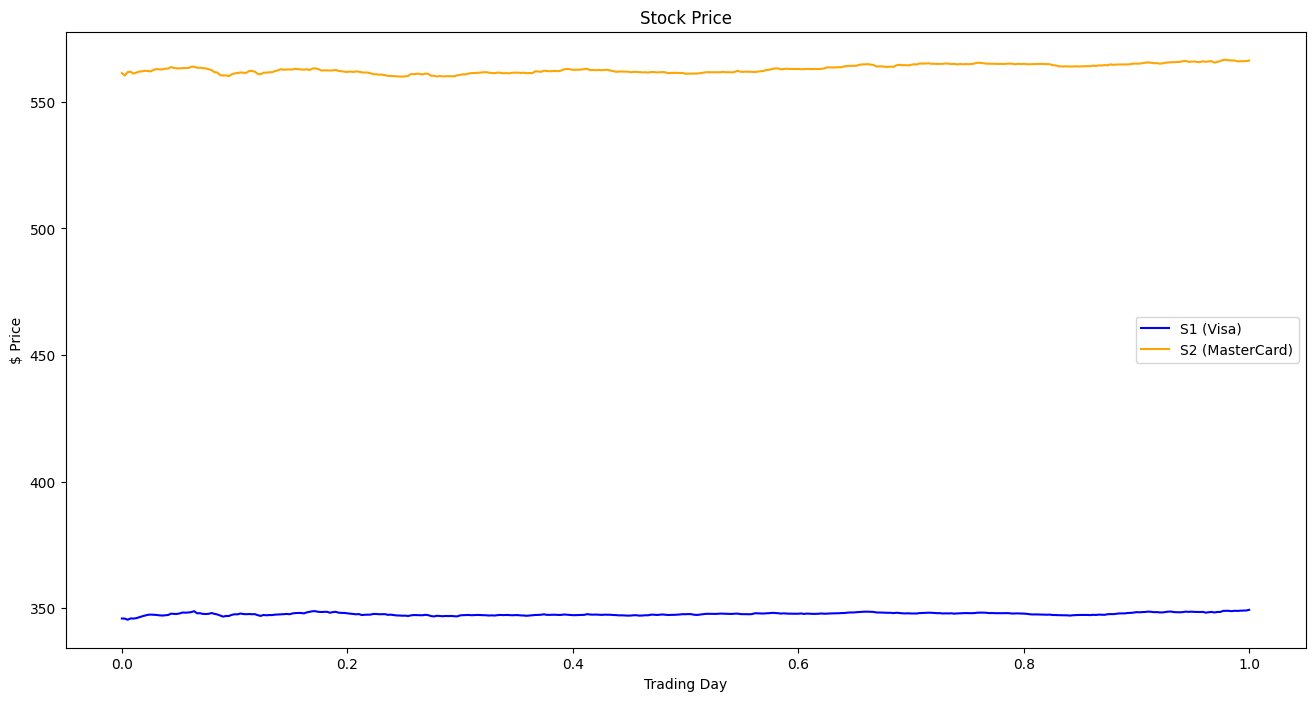

In [92]:
# Plot Stock Price
plt.figure(figsize = (16, 8))
plt.plot(tt, S1, 'blue', lw = 1.5, label = 'S1 (Visa)')
plt.plot(tt, S2, 'orange', lw = 1.5, label = 'S2 (MasterCard)')
plt.legend(loc = 0)
plt.xlabel('Trading Day')
plt.ylabel('$ Price')
plt.title('Stock Price')

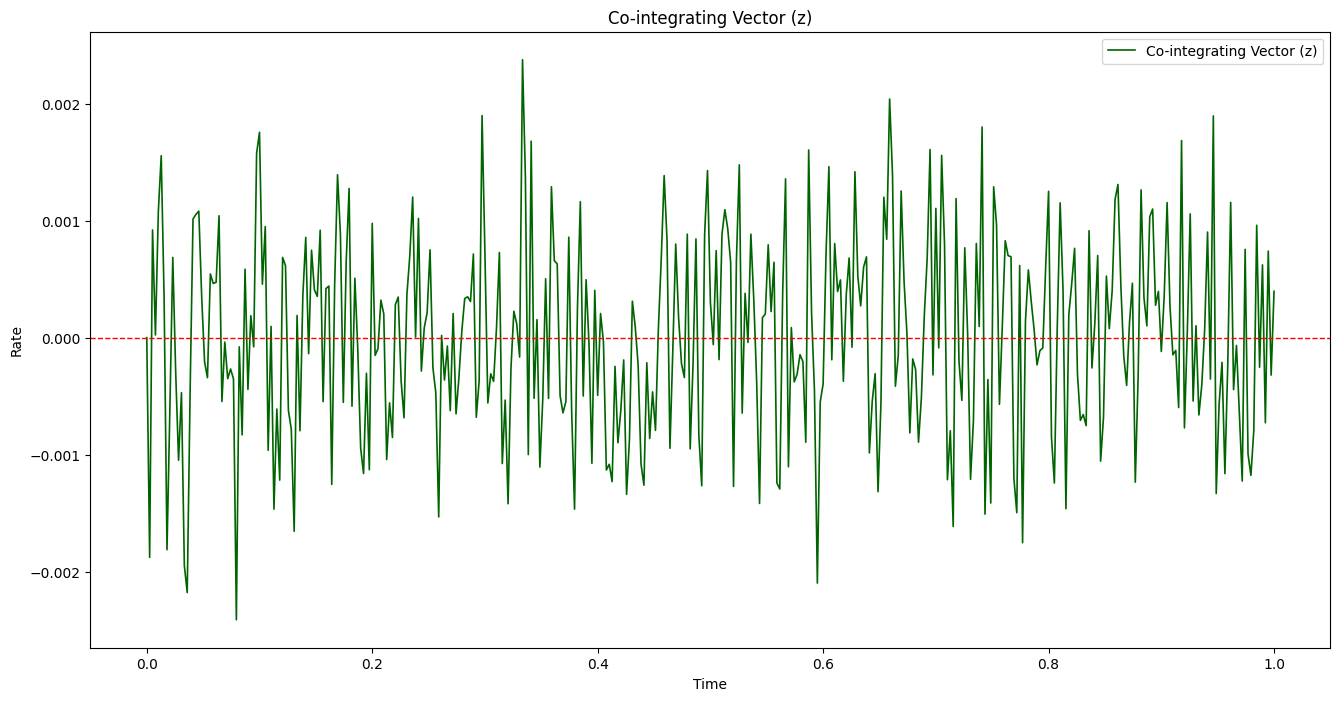

In [93]:
# Plot the co-integrating vector (z) over time (tt)
plt.figure(figsize = (16, 8))
plt.plot(tt, z, 'darkgreen', lw = 1.2, label = "Co-integrating Vector (z)")
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Co-integrating Vector (z)')
plt.legend()

# Add a horizontal red line at y = 0
plt.axhline(y = 0, color = 'red', linestyle='--', lw = 1)
plt.show()

#E) Optimal Trading Weights

In [94]:
# Iterate through each time step
for t in range(1, M + 1):
    # Compute coefficient 'a'
    a[t] = 0.5 * (T - t * dt) / ((1-rho ** 2) * sigma_1 ** 2)

    # Compute coefficient 'b'
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2) / ((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt) / ((1 - rho **2) * sigma_1 * sigma_2)

    # Compute coefficient 'c'
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt) / ((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1 / 24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2)

    # Compute optimal position in Stock 1
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta / gamma * (-2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * mu_2 / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

    # Compute optimal position in Stock 2
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

In [95]:
print(f'Pi_1 mean : {Pi_1.mean()}')
print(f'Pi_2 mean : {Pi_2.mean()}')

Pi_1 mean : 0.26344467269436356
Pi_2 mean : 0.16725929191433164


Text(0.5, 1.0, 'Optimal Trading Weights')

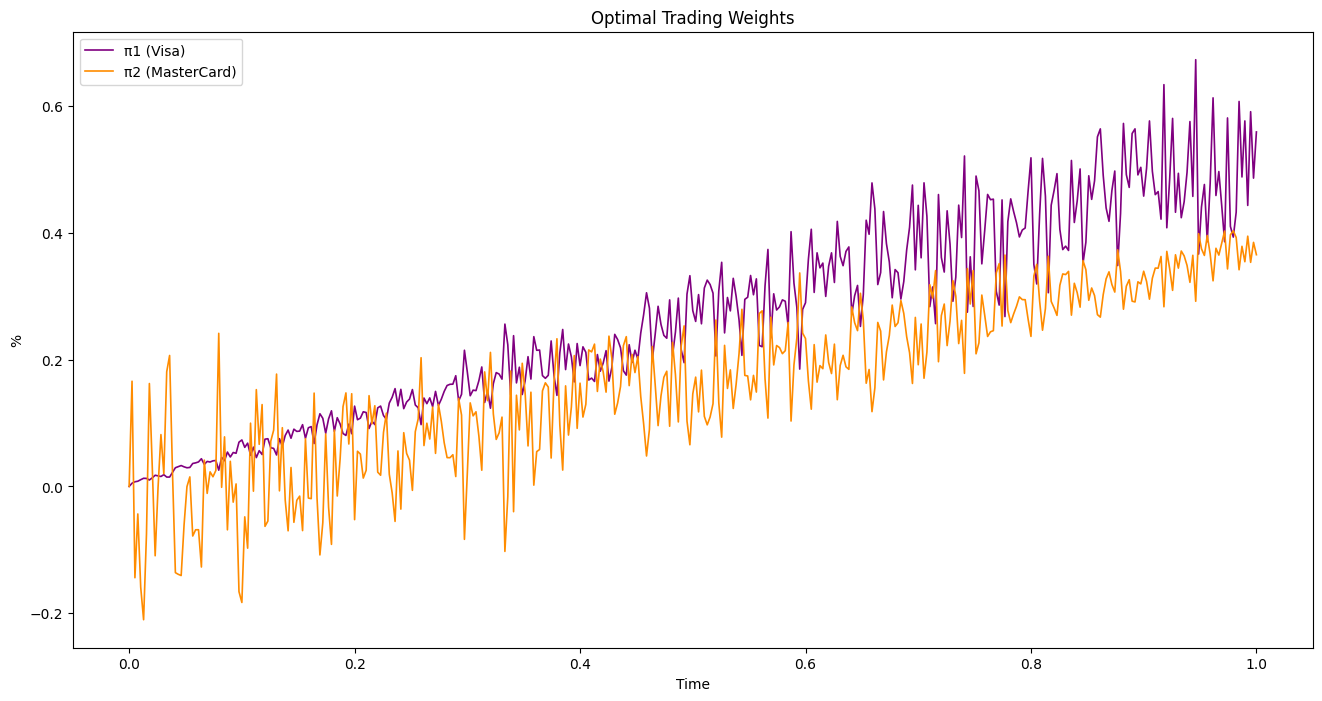

In [96]:
# Visualising Optimal Trading Positions
plt.figure(figsize = (16, 8))
plt.plot(tt, Pi_1, 'purple', lw = 1.2, label = 'π1 (Visa)')
plt.plot(tt, Pi_2, 'darkorange', lw = 1.2, label = 'π2 (MasterCard)')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Optimal Trading Weights')

#F) Optimal Cash Process

Text(0.5, 1.0, 'Cash Allocation Process')

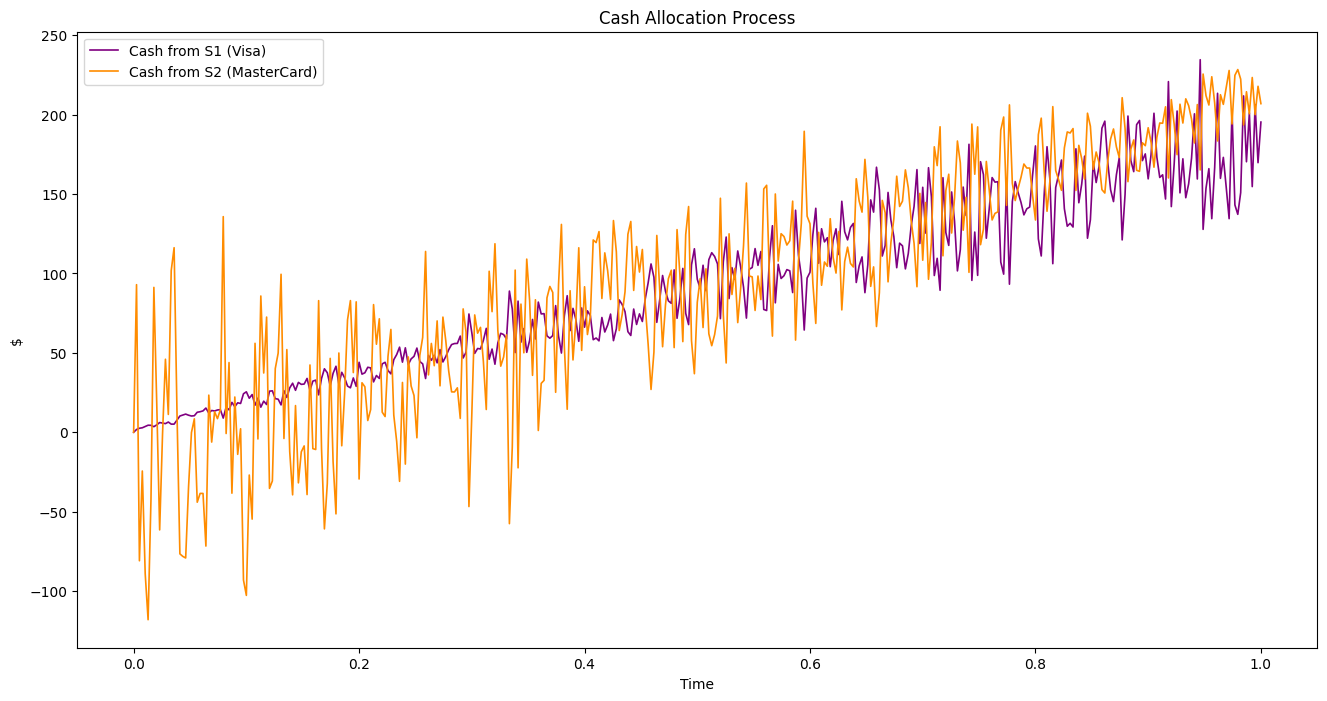

In [97]:
# Visualising the Optimal Cash Allocation
plt.figure(figsize = (16, 8))
plt.plot(tt, Pi_1 * S1, 'purple', lw = 1.2, label = 'Cash from S1 (Visa)')
plt.plot(tt, Pi_2 * S2, 'darkorange', lw = 1.2, label = 'Cash from S2 (MasterCard)')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash Allocation Process')

Text(0.5, 1.0, 'Total Wealth over Time')

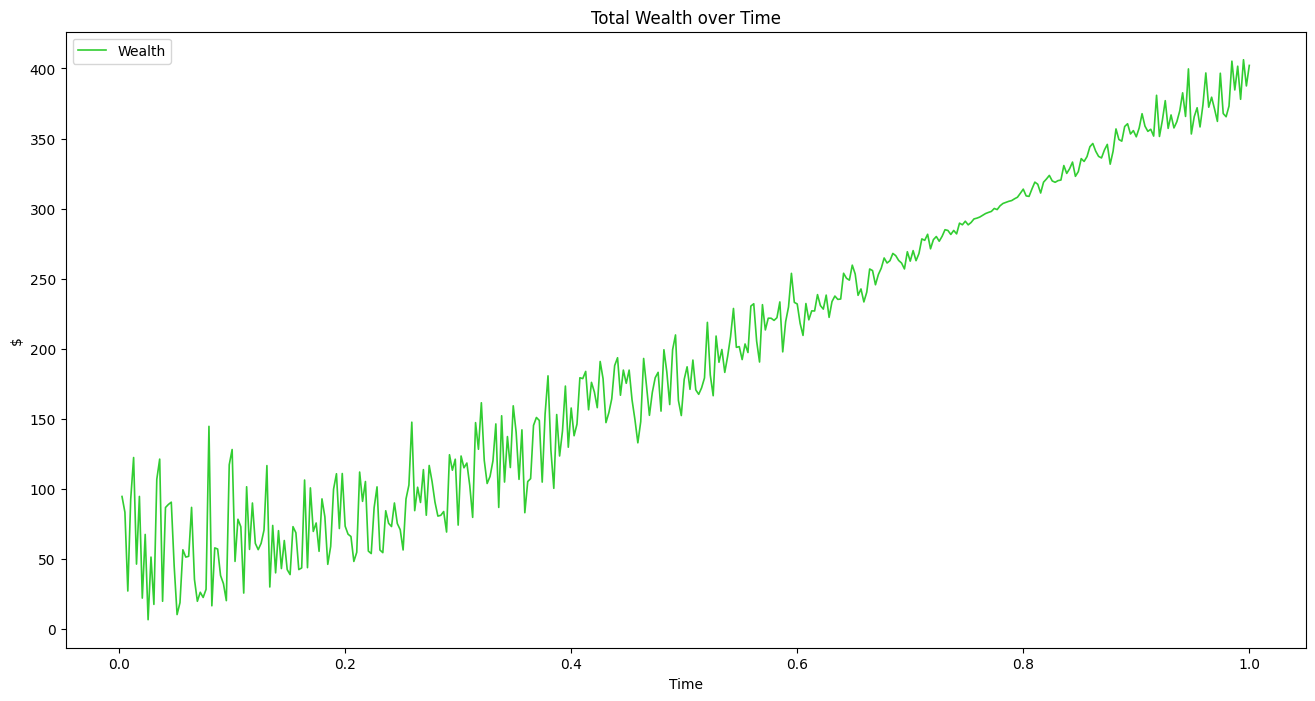

In [98]:
# Compute total wealth at each time step
# - Wealth is the sum of the absolute values of both stock positions.
# - abs() ensures the total capital allocation is captured, regardless of long/short positions.
wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

# Create a plot for better visualisation
plt.figure(figsize = (16, 8))
plt.plot(tt[1:], wealth[1:], 'limegreen', lw = 1.2, label = 'Wealth')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Total Wealth over Time')

#G) Dynamic Vs Static control

Text(0.5, 1.0, 'Comparison: Dynamic Vs Static Control')

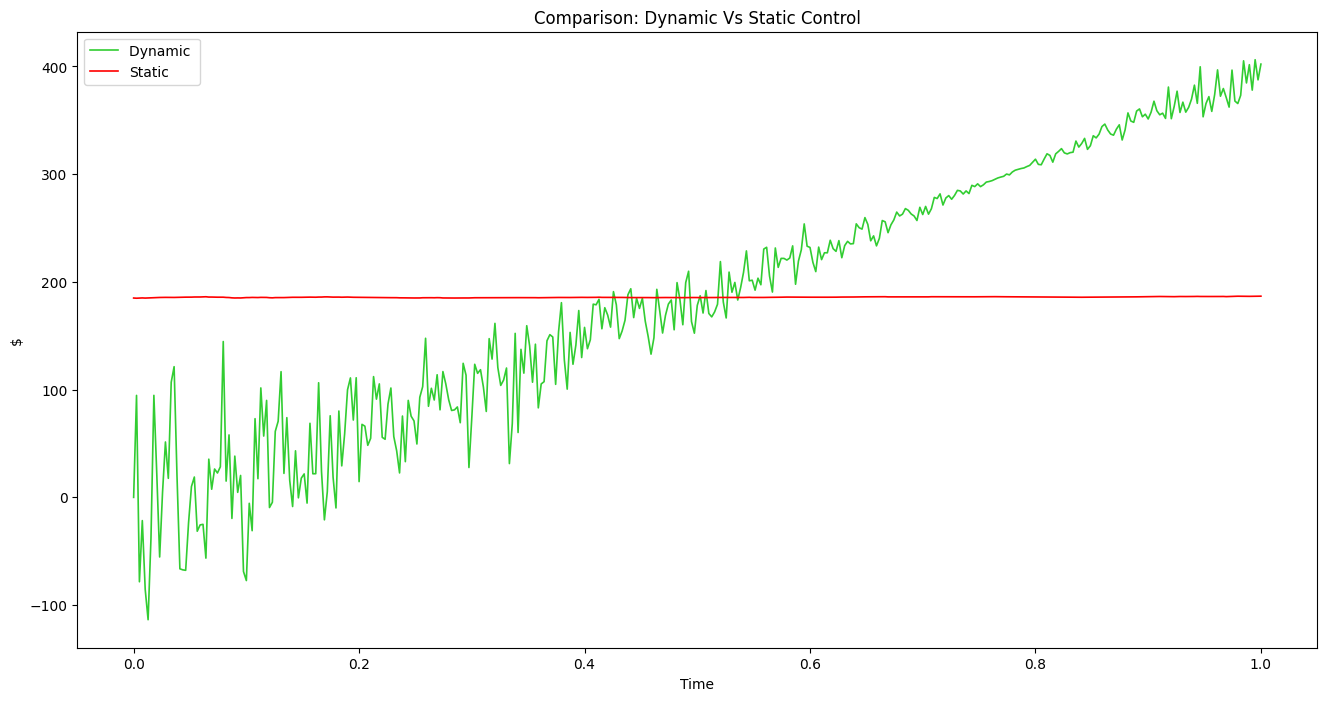

In [99]:
# Plot a Graph to Compare Dynamic Vs Static Strategies
plt.figure(figsize = (16, 8))

# This tracks wealth when positions (Pi_1, Pi_2) change over time based on real-time market conditions.
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'limegreen', lw = 1.2, label = 'Dynamic ')

# This assumes the trader holds a constant position (mean of Pi_1 and Pi_2) throughout the trading period.
# It acts as a benchmark to evaluate whether dynamic adjustments provide an advantage.
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'red', lw = 1.2, label = 'Static')
plt.legend(loc = 0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison: Dynamic Vs Static Control')

#H) Values for the Simulation

In [102]:
print("Conditions for simulation:")
print(f"S1_0 (Opening price of Visa):         {S1_0:.2f}")
print(f"S2_0 (Opening price of MasterCard):   {S2_0:.2f}")
print(f"z_0 (Initial value):                  {z_0}")

print(f"mu_1 (Drift of Visa):                 {mu_1:.5f}")
print(f"mu_2 (Drift of MasterCard):           {mu_2:.5f}")

print(f"sigma_1 (Volatility of Visa):         {sigma_1:.5f}")
print(f"sigma_2 (Volatility of MasterCard):   {sigma_2:.5f}")

print(f"beta (Cointegration coefficient):     {beta:.5f}")
print(f"gamma (Risk parameter):               {gamma}")
print(f"delta (Speed of mean reversion):      {delta}")
print(f"rho (Correlation between assets):     {rho:.5f}")

print(f"T (Total time period):                {T}")
print(f"M (Number of time steps):             {M}")

Conditions for simulation:
S1_0 (Opening price of Visa):         346.00
S2_0 (Opening price of MasterCard):   561.35
z_0 (Initial value):                  0
mu_1 (Drift of Visa):                 0.00998
mu_2 (Drift of MasterCard):           0.01051
sigma_1 (Volatility of Visa):         0.00848
sigma_2 (Volatility of MasterCard):   0.00842
beta (Cointegration coefficient):     1.32291
gamma (Risk parameter):               0.5
delta (Speed of mean reversion):      1
rho (Correlation between assets):     0.45492
T (Total time period):                1
M (Number of time steps):             390
